# 범죄자 범행동기 EDA

## 데이터셋

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 모든 열 보기
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [3]:
# 파일 확인
import glob
glob.glob("data/*")

['data/범죄자_범행동기_20220602183738.csv',
 'data/범죄자_범행동기_및_기간_2011_2020.csv',
 'data/카카오뱅크_323410_2022.05.18.csv',
 'data/krx.csv',
 'data/국민건강보험공단_건강검진정보_20211229.CSV',
 'data/범죄자_범행동기_2011_2020.csv',
 'data/AIR_HOUR_2021.csv',
 'data/etf_2022-05-23_raw.csv',
 'data/crime_final.csv',
 'data/news_005930_삼성전자.csv',
 'data/국민건강보험공단_의약품처방정보_20211229',
 'data/범죄자_공범관계_2011_2020.csv',
 'data/SE4DA02 0519 음식특성 - 매운맛.csv',
 'data/HP_T60_2020_1.CSV',
 'data/HP_T60_2020_2.CSV',
 'data/HP_T60_2020_3.CSV',
 'data/범죄자_생활정도__혼인관계_및_부모관계_20220602182104.csv',
 'data/135_DT_13501N_A042_20220531195702.csv',
 'data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv',
 'data/news_373220_LG에너지솔루션_2022.05.17.csv',
 'data/bidding_list.csv',
 'data/범죄자_공범관계_20220602184144.csv',
 'data/seoul-120-sample.csv',
 'data/135_DT_13501N_A039_20220531203023.csv',
 'data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
 'data/kosis-cancer-raw.csv',
 'data/seoul-120-list.csv',
 'data/seoul-covid19-2021-12-26.csv',
 

In [4]:
# 파일 불러오기
df = pd.read_csv("data/범죄자_범행동기_20220602183738.csv", encoding="cp949")

In [5]:
# shape 확인
df.shape

(7030, 6)

In [6]:
# 일부 데이터 확인
df.head(5)

,죄종별(1),죄종별(2),범행동기별(1),범행동기별(2),시점,데이터
0,계,소계,계,소계,2011,1815233
1,계,소계,계,소계,2012,1723815
2,계,소계,계,소계,2013,1741302
3,계,소계,계,소계,2014,1712435
4,계,소계,계,소계,2015,1771390


In [7]:
# 컬럼명 확인
df.columns

Index(['죄종별(1)', '죄종별(2)', '범행동기별(1)', '범행동기별(2)', '시점', '데이터'], dtype='object')

In [8]:
# 컬럼명 변경
df = df.rename(columns={
    "죄종별(1)":"범죄종류", "죄종별(2)" :"범죄명",
    "범행동기별(1)":"범행동기종류", "범행동기별(2)":"범행동기명", 
    "시점":"연도", "데이터":"범죄발생횟수"
})
# 바뀐 컬럼명 확인
df.columns

Index(['범죄종류', '범죄명', '범행동기종류', '범행동기명', '연도', '범죄발생횟수'], dtype='object')

## 결측치

In [9]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄종류    7030 non-null   object
 1   범죄명     7030 non-null   object
 2   범행동기종류  7030 non-null   object
 3   범행동기명   7030 non-null   object
 4   연도      7030 non-null   int64 
 5   범죄발생횟수  7030 non-null   object
dtypes: int64(1), object(5)
memory usage: 329.7+ KB


In [9]:
# 결측값 확인
df.isnull().sum()

범죄종류      0
범죄명       0
범행동기종류    0
범행동기명     0
연도        0
범죄발생횟수    0
dtype: int64

In [10]:
# 히트맵으로 결측치 시각화
# _ = sns.heatmap(df.isnull(), cmap="gray")

In [11]:
# 결측값 비율
df.isnull().mean()*100

범죄종류      0.0
범죄명       0.0
범행동기종류    0.0
범행동기명     0.0
연도        0.0
범죄발생횟수    0.0
dtype: float64

In [12]:
# 데이터 타입 확인
df.dtypes

범죄종류      object
범죄명       object
범행동기종류    object
범행동기명     object
연도         int64
범죄발생횟수    object
dtype: object

In [13]:
df['범죄발생횟수'] = pd.to_numeric(df['범죄발생횟수'], errors='coerce', downcast='integer')
df['범죄발생횟수'].dtypes

dtype('float64')

In [14]:
# 결측치 0으로 변경 & int타입으로 변경
df['범죄발생횟수'] = df['범죄발생횟수'].fillna(0).astype(int)
# 확인
df.isnull().sum()

범죄종류      0
범죄명       0
범행동기종류    0
범행동기명     0
연도        0
범죄발생횟수    0
dtype: int64

In [16]:
# 컬럼 고유값 확인
for col in df.columns:
    print(col, ":", end = "")
    print(df[col].unique(), end="\n\n")

범죄종류 :['계' '강력범죄' '절도범죄' '폭력범죄' '지능범죄' '풍속범죄' '특별경제범죄' '마약범죄' '보건범죄' '환경범죄'
 '교통범죄' '노동범죄' '안보범죄' '선거범죄' '병역범죄' '기타범죄']

범죄명 :['소계' '살인기수' '살인미수등' '강도' '강간·강제추행' '강간' '유사강간' '강제추행' '기타 강간·강제추행등' '방화'
 '상해' '폭행' '체포·감금' '협박' '약취·유인' '폭력행위등' '공갈' '손괴' '직무유기' '직권남용' '증수뢰' '통화'
 '문서·인장' '유가증권인지' '사기' '횡령' '배임' '성풍속범죄' '도박범죄']

범행동기종류 :['계' '이욕' '사행심' '보복' '가정불화' '호기심' '유혹' '우발적' '현실불만' '부주의' '기타' '미상']

범행동기명 :['소계' '생활비' '유흥비' '도박비' '허영사치심' '치부' '기타']

연도 :[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]

범죄발생횟수 :[1815233 1723815 1741302 ...   73907   78719   77523]



In [17]:
df.groupby(by=["연도", "범죄명"]).sum()


범죄발생횟수
연도   범죄명            
2011 강간·강제추행   36342
     강도        11816
     공갈         8605
     도박범죄      99826
     문서·인장     46327
...              ...
2020 통화          186
     폭력행위등     51499
     폭행       357185
     협박        45109
     횡령        77656

[274 rows x 1 columns]

In [18]:
# 소계 하나뿐인지 확인
df.groupby(by=['범죄종류', '범죄명']).count()

범행동기종류  범행동기명   연도  범죄발생횟수
범죄종류   범죄명                                    
강력범죄   강간              143    143  143     143
       강간·강제추행          36     36   36      36
       강도              177    177  177     177
       강제추행            135    135  135     135
       기타 강간·강제추행등     135    135  135     135
       방화              162    162  162     162
       살인기수            151    151  151     151
       살인미수등           145    145  145     145
       소계              180    180  180     180
       유사강간            122    122  122     122
계      소계              180    180  180     180
교통범죄   소계              177    177  177     177
기타범죄   소계              180    180  180     180
노동범죄   소계              156    156  156     156
마약범죄   소계              173    173  173     173
병역범죄   소계              163    163  163     163
보건범죄   소계              175    175  175     175
선거범죄   소계              146    146  146     146
안보범죄   소계              130    130  130     130
절도범죄   소계              180    180  180     180
지능범죄   문서·인장           177    177  177     177
       배임              168    168  168     168
       사기              180    180  180     180
       소계              180    180  180     180
       유가증권인지          140    140  140     140
       증수뢰             154    154  154     154
       직권남용            123    123  123     123
       직무유기            119    119  119     119
       통화              143    143  143     143
       횡령              179    179  179     179
특별경제범죄 소계              180    180  180     180
폭력범죄   공갈              178    178  178     178
       상해              178    178  178     178
       소계              180    180  180     180
       손괴              175    175  175     175
       약취·유인           152    152  152     152
       체포·감금           162    162  162     162
       폭력행위등           180    180  180     180
       폭행              178    178  178     178
       협박              169    169  169     169
풍속범죄   도박범죄            176    176  176     176
       성풍속범죄           174    174  174     174
       소계              179    179  179     179
환경범죄   소계              160    160  160     160

In [19]:
# 소계 하나뿐인지 확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

,,범죄종류,범죄명,연도,범죄발생횟수
범행동기종류,범행동기명,,,,
가정불화,소계,385,385,385,385
계,소계,424,424,424,424
기타,소계,424,424,424,424
미상,소계,424,424,424,424
보복,소계,334,334,334,334
부주의,소계,420,420,420,420
사행심,소계,385,385,385,385
우발적,소계,422,422,422,422
유혹,소계,393,393,393,393


In [20]:
# '계' 들어가는 행 삭제
drops_col = ['강력범죄', '지능범죄', '폭력범죄', '풍속범죄']
drops = ((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '강력범죄')) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '폭력범죄')) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '지능범죄')) |\
((df['범죄명'].str.contains('계')) & (df['범죄종류'] == '풍속범죄')) |\
    df['범죄종류'].str.contains('계') | df['범행동기종류'].str.contains('계')
df = df[~drops]

#확인
df.tail(10)

,범죄종류,범죄명,범행동기종류,범행동기명,연도,범죄발생횟수
7020,기타범죄,소계,미상,소계,2011,47610
7021,기타범죄,소계,미상,소계,2012,43712
7022,기타범죄,소계,미상,소계,2013,47001
7023,기타범죄,소계,미상,소계,2014,51882
7024,기타범죄,소계,미상,소계,2015,58928
7025,기타범죄,소계,미상,소계,2016,71168
7026,기타범죄,소계,미상,소계,2017,68107
7027,기타범죄,소계,미상,소계,2018,73907
7028,기타범죄,소계,미상,소계,2019,78719
7029,기타범죄,소계,미상,소계,2020,77523


In [21]:
# 컬럼 고유값 확인
for col in df.columns:
    print(col, ":", end = "")
    print(df[col].unique(), end="\n\n")

범죄종류 :['강력범죄' '절도범죄' '폭력범죄' '지능범죄' '풍속범죄' '특별경제범죄' '마약범죄' '보건범죄' '환경범죄' '교통범죄'
 '노동범죄' '안보범죄' '선거범죄' '병역범죄' '기타범죄']

범죄명 :['살인기수' '살인미수등' '강도' '강간·강제추행' '강간' '유사강간' '강제추행' '기타 강간·강제추행등' '방화' '소계'
 '상해' '폭행' '체포·감금' '협박' '약취·유인' '폭력행위등' '공갈' '손괴' '직무유기' '직권남용' '증수뢰' '통화'
 '문서·인장' '유가증권인지' '사기' '횡령' '배임' '성풍속범죄' '도박범죄']

범행동기종류 :['이욕' '사행심' '보복' '가정불화' '호기심' '유혹' '우발적' '현실불만' '부주의' '기타' '미상']

범행동기명 :['소계' '생활비' '유흥비' '도박비' '허영사치심' '치부' '기타']

연도 :[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]

범죄발생횟수 :[   42    36    24 ... 73907 78719 77523]



In [22]:
# 범죄명이 '소계'로 된 컬럼명 바꾸기
drops_col = ['강력범죄', '지능범죄', '폭력범죄', '풍속범죄']
for col in df['범죄종류'].unique().tolist():
    if col not in drops_col:
        df.loc[df['범죄종류'] == col, '범죄명'] = col

In [23]:
# 소계 확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

,,범죄종류,범죄명,연도,범죄발생횟수
범행동기종류,범행동기명,,,,
가정불화,소계,335,335,335,335
기타,소계,374,374,374,374
미상,소계,374,374,374,374
보복,소계,285,285,285,285
부주의,소계,370,370,370,370
사행심,소계,335,335,335,335
우발적,소계,372,372,372,372
유혹,소계,343,343,343,343
이욕,기타,373,373,373,373


In [24]:
# 범행동기명이 '소계'로 된 컬럼명 바꾸기
drops = ['이욕']
for col in df['범행동기종류'].unique().tolist():
    if col not in drops:
        df.loc[df['범행동기종류'] == col, '범행동기명'] = col

In [25]:
# 제대로 변경 되었는지 확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

,,범죄종류,범죄명,연도,범죄발생횟수
범행동기종류,범행동기명,,,,
가정불화,가정불화,335,335,335,335
기타,기타,374,374,374,374
미상,미상,374,374,374,374
보복,보복,285,285,285,285
부주의,부주의,370,370,370,370
사행심,사행심,335,335,335,335
우발적,우발적,372,372,372,372
유혹,유혹,343,343,343,343
이욕,기타,373,373,373,373


In [26]:
# 이욕의 범행동기명 중 '계' 들어가는 행 삭제
drops=((df['범행동기종류'] == '이욕') & (df['범행동기명'] == '소계'))
df = df[~drops]
#확인
df.groupby(by=['범행동기종류', '범행동기명']).count()

,,범죄종류,범죄명,연도,범죄발생횟수
범행동기종류,범행동기명,,,,
가정불화,가정불화,335,335,335,335
기타,기타,374,374,374,374
미상,미상,374,374,374,374
보복,보복,285,285,285,285
부주의,부주의,370,370,370,370
사행심,사행심,335,335,335,335
우발적,우발적,372,372,372,372
유혹,유혹,343,343,343,343
이욕,기타,373,373,373,373


In [27]:
# 인덱스 재정의
df = df.reset_index(drop=True)
df.head()

,범죄종류,범죄명,범행동기종류,범행동기명,연도,범죄발생횟수
0,강력범죄,살인기수,이욕,생활비,2011,5
1,강력범죄,살인기수,이욕,생활비,2012,1
2,강력범죄,살인기수,이욕,생활비,2013,3
3,강력범죄,살인기수,이욕,생활비,2014,1
4,강력범죄,살인기수,이욕,생활비,2016,1


In [28]:
# 컬럼 재정렬
cols = ["범죄명", "연도", "범행동기명", "범행동기종류","범죄종류" , "범죄발생횟수"]
df = df[cols]

In [29]:
# 데이터 확인
df.head(5)

,범죄명,연도,범행동기명,범행동기종류,범죄종류,범죄발생횟수
0,살인기수,2011,생활비,이욕,강력범죄,5
1,살인기수,2012,생활비,이욕,강력범죄,1
2,살인기수,2013,생활비,이욕,강력범죄,3
3,살인기수,2014,생활비,이욕,강력범죄,1
4,살인기수,2016,생활비,이욕,강력범죄,1


In [30]:
# 데이터 shape
df.shape

(5384, 6)

## 데이터 요약

In [31]:
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     5384 non-null   object
 1   연도      5384 non-null   int64 
 2   범행동기명   5384 non-null   object
 3   범행동기종류  5384 non-null   object
 4   범죄종류    5384 non-null   object
 5   범죄발생횟수  5384 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 252.5+ KB


In [32]:
# 수치형통계
df.describe()

,연도,범죄발생횟수
count,5384.000000,5384.000000
mean,2015.775446,3149.929792
std,2.876281,14950.315058
min,2011.000000,0.000000
25%,2013.000000,4.000000
50%,2016.000000,41.000000
75%,2018.000000,483.000000
max,2020.000000,187583.000000


In [33]:
# 범죄발생횟수가 가장 많은 범죄명, 연도, 범행동기명, 범행동기종류
df[df["범죄발생횟수"]==187583]

,범죄명,연도,범행동기명,범행동기종류,범죄종류,범죄발생횟수
4678,교통범죄,2011,부주의,부주의,교통범죄,187583


In [34]:
# 범주형 통계
df.describe(include="object")

,범죄명,범행동기명,범행동기종류,범죄종류
count,5384,5384,5384,5384
unique,39,15,11,15
top,기타범죄,기타,이욕,폭력범죄
freq,160,747,1930,1212


In [35]:
# 인덱스명 범죄종류로 바꾸기
df.set_index('범죄명')

,연도,범행동기명,범행동기종류,범죄종류,범죄발생횟수
범죄명,,,,,
살인기수,2011,생활비,이욕,강력범죄,5
살인기수,2012,생활비,이욕,강력범죄,1
살인기수,2013,생활비,이욕,강력범죄,3
살인기수,2014,생활비,이욕,강력범죄,1
살인기수,2016,생활비,이욕,강력범죄,1
...,...,...,...,...,...
기타범죄,2016,미상,미상,기타범죄,71168
기타범죄,2017,미상,미상,기타범죄,68107
기타범죄,2018,미상,미상,기타범죄,73907


In [36]:
df.groupby(by=['연도', '범죄명']).mean().head(30).sort_values("범죄발생횟수", ascending=False)

범죄발생횟수
연도   범죄명                  
2011 교통범죄     32771.875000
     사기       16539.625000
     기타범죄     14048.812500
     절도범죄      6961.875000
     특별경제범죄    5726.375000
     상해        5571.125000
     도박범죄      2885.875000
     손괴        1796.812500
     병역범죄      1625.142857
     문서·인장     1381.562500
     보건범죄      1277.812500
     강간·강제추행   1103.250000
     성풍속범죄      950.562500
     배임         524.000000
     마약범죄       360.600000
     강도         305.625000
     공갈         252.400000
     노동범죄       220.083333
     방화         116.846154
     증수뢰        103.250000
     직무유기        95.571429
     유가증권인지      93.181818
     체포·감금       88.090909
     살인미수등       69.666667
     직권남용        59.500000
     선거범죄        50.000000
     살인기수        34.538462
     약취·유인       30.909091
     안보범죄        17.777778
     통화          11.000000

In [37]:
# 컬럼 고유값 재확인
for col in df.columns:
    print(col, ":", end = "")
    print(df[col].unique(), end="\n\n")

범죄명 :['살인기수' '살인미수등' '강도' '강간·강제추행' '강간' '유사강간' '강제추행' '기타 강간·강제추행등' '방화'
 '절도범죄' '상해' '폭행' '체포·감금' '협박' '약취·유인' '폭력행위등' '공갈' '손괴' '직무유기' '직권남용'
 '증수뢰' '통화' '문서·인장' '유가증권인지' '사기' '횡령' '배임' '성풍속범죄' '도박범죄' '특별경제범죄' '마약범죄'
 '보건범죄' '환경범죄' '교통범죄' '노동범죄' '안보범죄' '선거범죄' '병역범죄' '기타범죄']

연도 :[2011 2012 2013 2014 2016 2017 2018 2019 2020 2015]

범행동기명 :['생활비' '유흥비' '도박비' '허영사치심' '치부' '기타' '사행심' '보복' '가정불화' '호기심' '유혹' '우발적'
 '현실불만' '부주의' '미상']

범행동기종류 :['이욕' '사행심' '보복' '가정불화' '호기심' '유혹' '우발적' '현실불만' '부주의' '기타' '미상']

범죄종류 :['강력범죄' '절도범죄' '폭력범죄' '지능범죄' '풍속범죄' '특별경제범죄' '마약범죄' '보건범죄' '환경범죄' '교통범죄'
 '노동범죄' '안보범죄' '선거범죄' '병역범죄' '기타범죄']

범죄발생횟수 :[    5     1     3 ... 73907 78719 77523]



In [38]:
#파일 저장
df.to_csv("범죄자_범행동기_2011_2020.csv", index=False)

## 시각화

In [39]:
# 연도 object 타입으로 바꾸기   
df["연도"] = df["연도"].astype("object")

# 데이터 타입 확인
df.dtypes

범죄명       object
연도        object
범행동기명     object
범행동기종류    object
범죄종류      object
범죄발생횟수     int64
dtype: object

In [40]:
# 범죄명 빈도수 확인
df["범죄명"].value_counts()

기타범죄           160
절도범죄           160
사기             160
특별경제범죄         160
폭력행위등          160
횡령             159
공갈             158
상해             158
폭행             158
강도             157
교통범죄           157
문서·인장          157
도박범죄           156
손괴             155
보건범죄           155
성풍속범죄          154
마약범죄           153
협박             149
배임             148
병역범죄           143
체포·감금          142
방화             142
환경범죄           140
노동범죄           136
증수뢰            134
약취·유인          132
살인기수           131
강간             127
선거범죄           126
살인미수등          125
통화             123
유가증권인지         120
기타 강간·강제추행등    119
강제추행           119
안보범죄           111
유사강간           106
직권남용           103
직무유기            99
강간·강제추행         32
Name: 범죄명, dtype: int64

In [41]:
# 시각화를 위한 한글폰트 설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

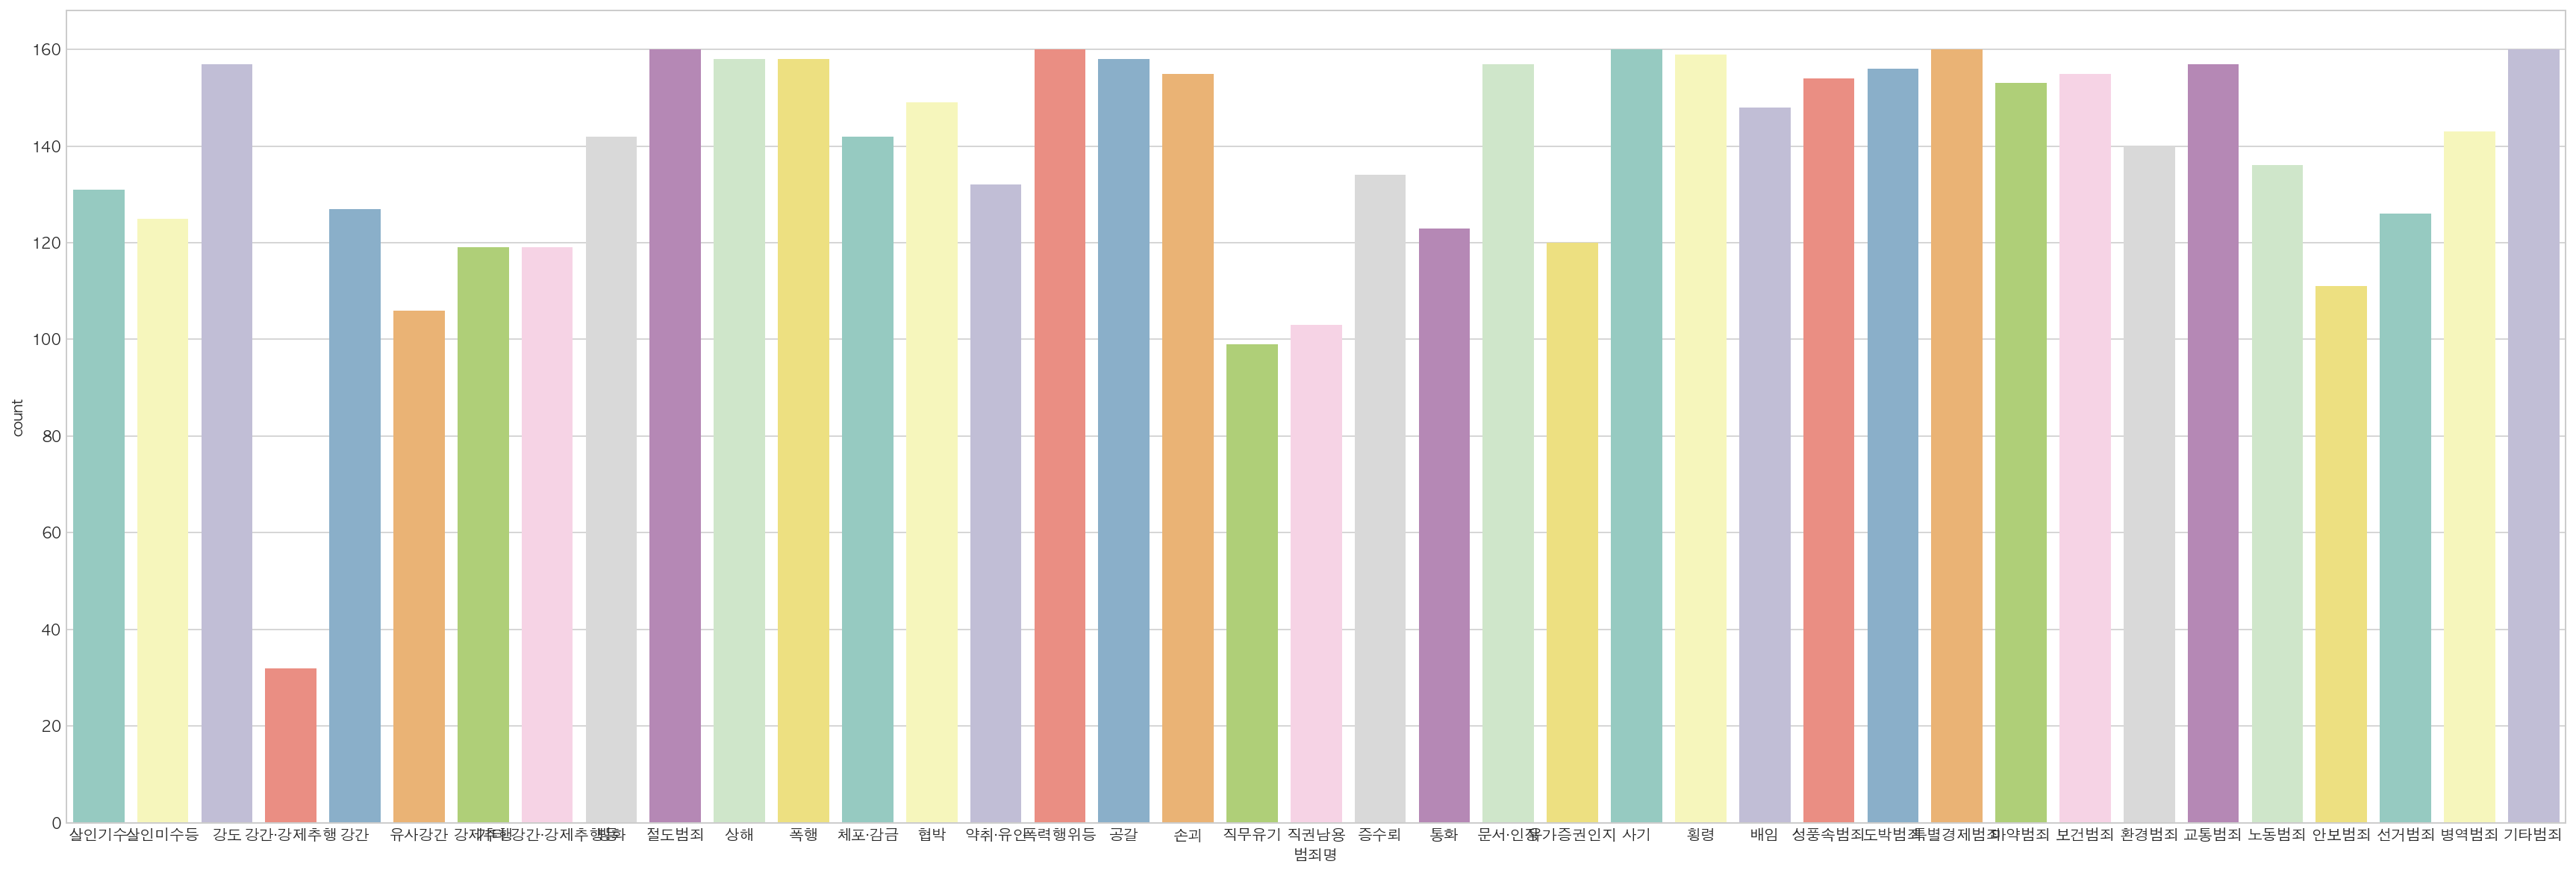

In [42]:
# 범죄명 빈도수 countplot으로 시각화
# _ = sns.countplot(x=df["범죄명"])
plt.figure(figsize=(30, 10))
_ = sns.countplot(data=df, x="범죄명", palette="Set3")

In [43]:
# 연도에 따른 빈도수
df["연도"].value_counts()

2017    608
2018    608
2019    608
2020    608
2013    511
2016    503
2015    498
2014    491
2011    480
2012    469
Name: 연도, dtype: int64

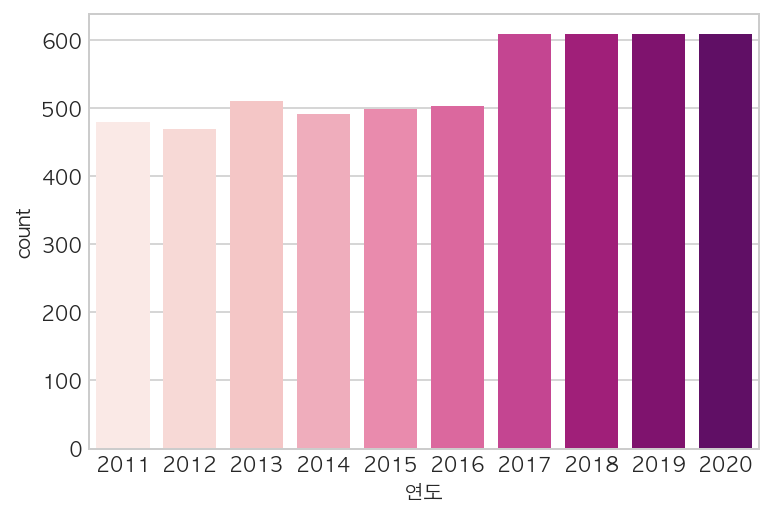

In [44]:
# 연도에 따른 빈도수 시각화
_ = sns.countplot(data=df, x="연도", palette="RdPu")

In [45]:
# 범행동기종류별 빈도수
df["범행동기종류"].value_counts()

이욕      1930
기타       374
미상       374
우발적      372
부주의      370
유혹       343
현실불만     338
사행심      335
가정불화     335
호기심      328
보복       285
Name: 범행동기종류, dtype: int64

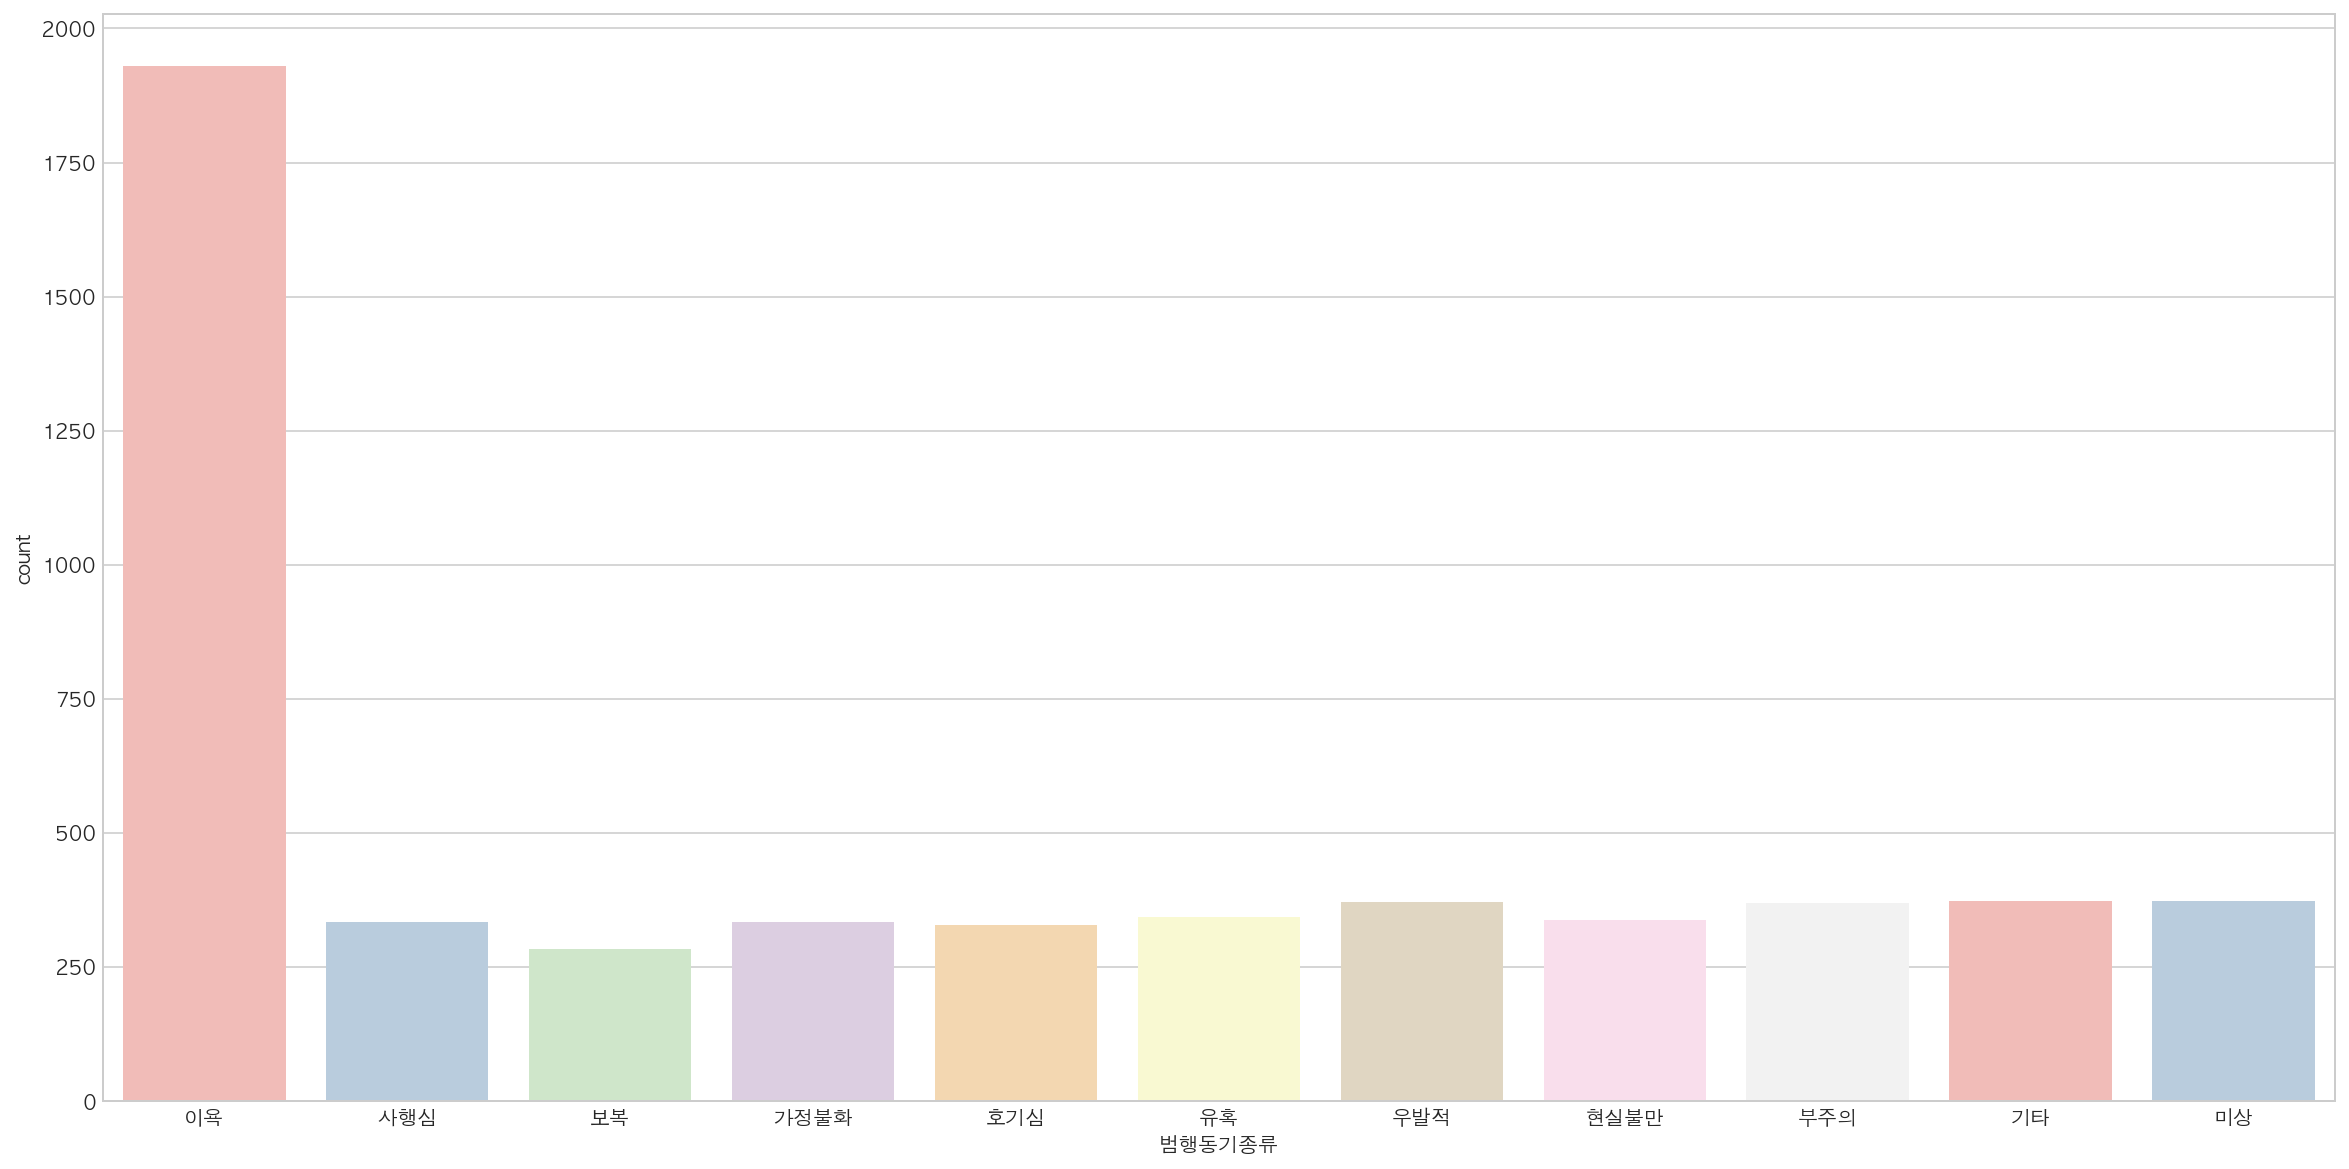

In [46]:
# 범행동기종류 시각화
plt.figure(figsize=(20, 10))
_ = sns.countplot(data=df, x="범행동기종류", palette="Pastel1")

In [47]:
# 이욕 중 금전적 범행동기 종류 빈도수
df_greed = df[(df["범행동기명"] =="생활비") | (df["범행동기명"] =="유흥비")| \
             (df["범행동기명"] =="도박비") | (df["범행동기명"] =="허영사치심")| \
             (df["범행동기명"] =="치부") ]
df_greed["범행동기명"].value_counts()

생활비      355
치부       324
유흥비      323
허영사치심    284
도박비      271
Name: 범행동기명, dtype: int64

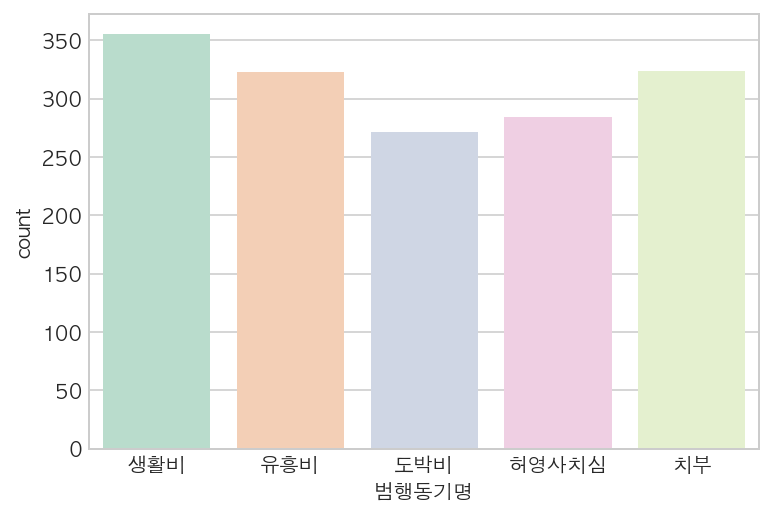

In [48]:
# 이욕 중 금전적 범행동기종류 시각화
_ = sns.countplot(data=df_greed, x="범행동기명", palette = "Pastel2")

In [49]:
# 범죄종류 빈도수
df["범죄종류"].value_counts()

폭력범죄      1212
지능범죄      1203
강력범죄      1058
풍속범죄       310
절도범죄       160
특별경제범죄     160
기타범죄       160
교통범죄       157
보건범죄       155
마약범죄       153
병역범죄       143
환경범죄       140
노동범죄       136
선거범죄       126
안보범죄       111
Name: 범죄종류, dtype: int64

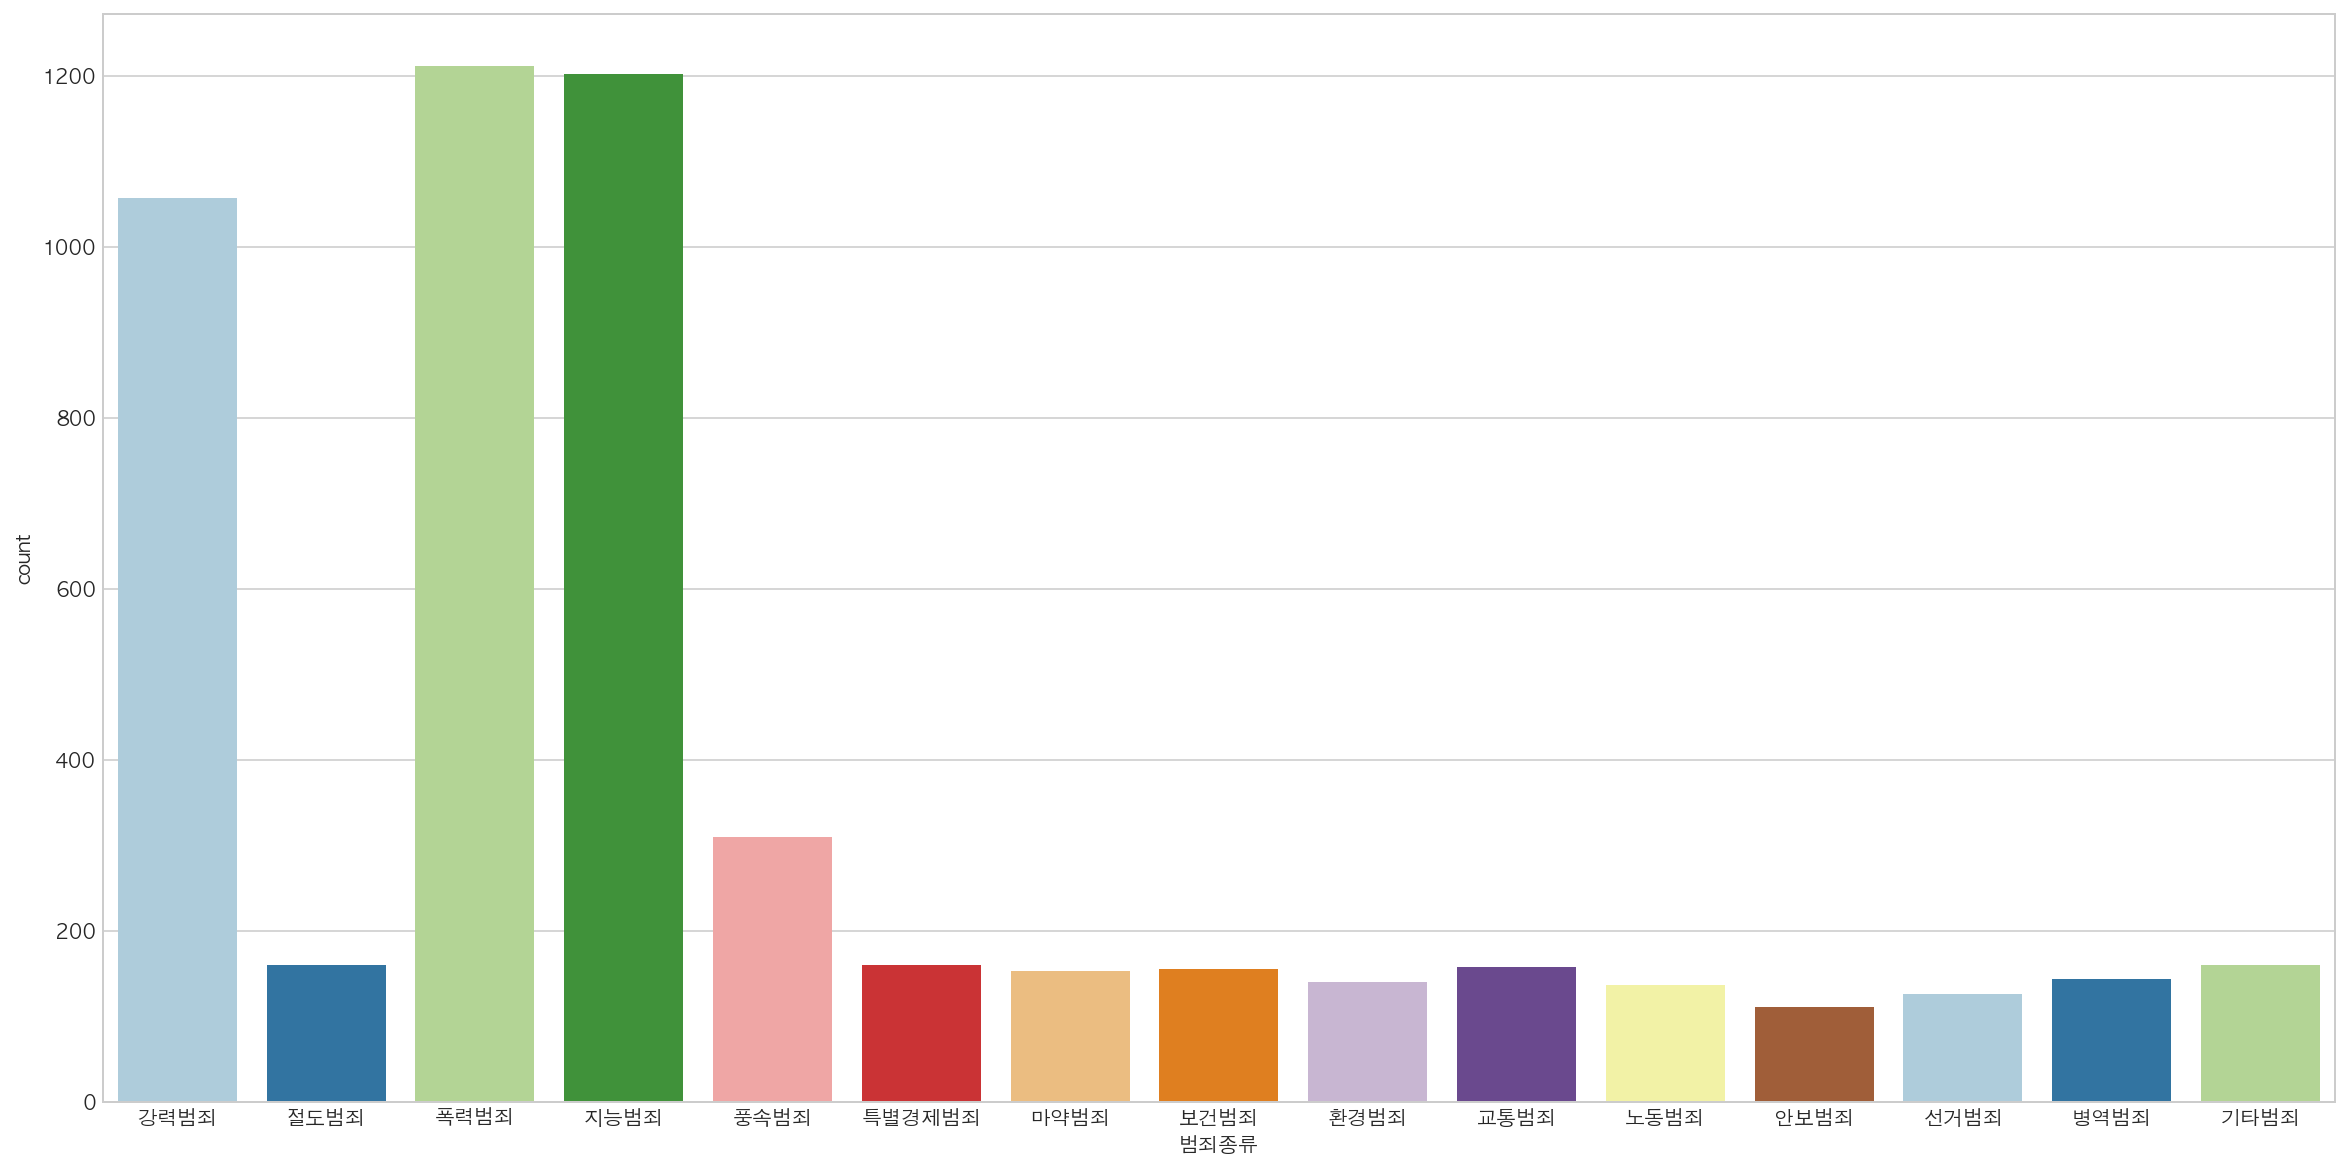

In [50]:
# 범죄종류 시각화
plt.figure(figsize=(20, 10))
_ = sns.countplot(data=df, x="범죄종류", palette = "Paired")

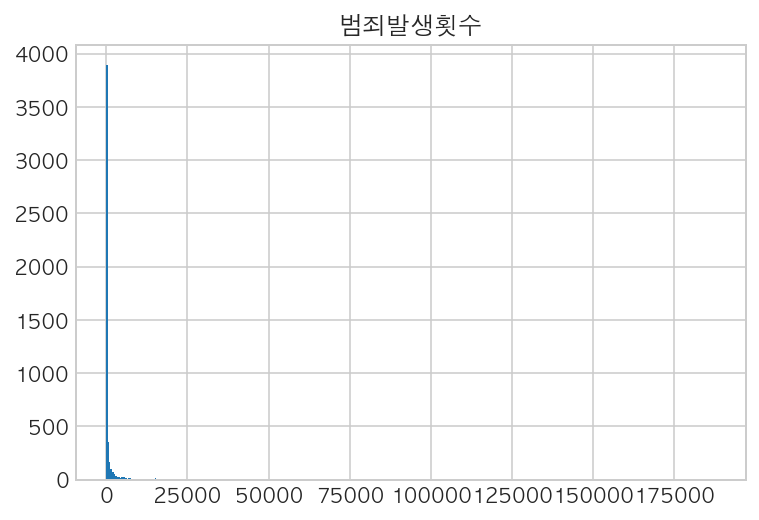

In [108]:
# 수치형데이터 분포 시각화
_ = df.hist(bins=500)

### 연도별

In [113]:
# 연도별 

,범죄발생횟수
연도,
2011,3781.735417
2012,3675.511727
2013,3407.636008
2014,3487.647658
2015,3557.008032
2016,3673.170974
2017,2772.139803
2018,2601.845395
2019,2607.957237


In [51]:
# 범죄종류와 범행동기별 평균 범죄발생횟수
df.sample(10)

,범죄명,연도,범행동기명,범행동기종류,범죄종류,범죄발생횟수
2800,통화,2020,치부,이욕,지능범죄,0
1713,협박,2018,치부,이욕,폭력범죄,1
2202,공갈,2018,가정불화,가정불화,폭력범죄,5
3405,횡령,2011,가정불화,가정불화,지능범죄,11
2557,직권남용,2016,기타,이욕,지능범죄,3
4625,교통범죄,2018,보복,보복,교통범죄,2
1418,폭행,2015,치부,이욕,폭력범죄,9
180,살인미수등,2015,보복,보복,강력범죄,4
1491,폭행,2018,우발적,우발적,폭력범죄,66700
949,방화,2018,치부,이욕,강력범죄,0


In [ ]:
# 범죄종류별 